
<p align="center">
  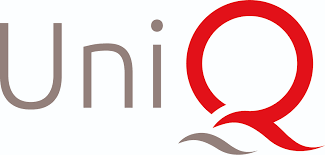
  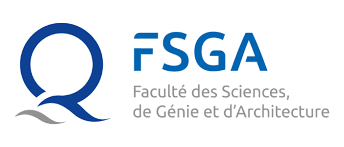
</p>

# Séance 1 — Mathématiques pour l’informatique (Bac+2)
**Thème :** Logique & conditions (connecteurs, tables de vérité, équivalences utiles)  
**Objectif du jour :** traduire des énoncés en tests booléens corrects, lire une table de vérité, appliquer 2–3 équivalences.


## Plan de la séance (90 min)
1. **Connexion** : mini-sondage & binômes (10 min)  
2. **Logique de base** : connecteurs, priorité, équivalences utiles (25 min)  
3. **Tables de vérité** + tautologies (15 min)  
4. **Traduction de conditions en code** (20 min)  
5. **Ensembles (aperçu)** : dédoublonnage avec `set` (10 min)  
6. **Wrap-up** : ticket de sortie (10 min)


---
## 0) Connexion — mini-sondage & formation des binômes

- Ouvrez le **formulaire d’introduction** et répondez (5 min).
- Partagez **1 objectif** et **1 thème** qui vous motivent.
- L’enseignant peut utiliser la cellule ci-dessous pour créer des binômes aléatoires.


In [ ]:
# ⬇️ Collez la liste des prénoms, séparés par des virgules.
noms = "Ana,Bruno,Chloe,David,Emile,Fatma,Gina,Hector,Ines,Jonas,Karl,Lisa,Mo,Naomi,Oumar,Paula"

import random, math
def faire_binomes(noms_csv, taille=2, seed=42):
    random.seed(seed)
    etu = [n.strip() for n in noms_csv.split(",") if n.strip()]
    random.shuffle(etu)
    bins = [etu[i:i+taille] for i in range(0, len(etu), taille)]
    if len(bins) > 0 and len(bins[-1]) == 1 and len(bins) >= 2:
        # si dernier groupe de 1, l'ajouter au précédent
        bins[-2] += bins[-1]
        bins = bins[:-1]
    return bins

binomes = faire_binomes(noms, taille=2, seed=7)
for i, b in enumerate(binomes, 1):
    print(f"Binôme {i}: {', '.join(b)}")

---
## 1) Logique — connecteurs & équivalences utiles

Nous représenterons les propositions par des booléens Python (`True`/`False`).

In [ ]:
def implies(p: bool, q: bool) -> bool:
    """Implication logique p -> q. Équivalent à (not p) or q."""
    return (not p) or q

def iff(p: bool, q: bool) -> bool:
    """Équivalence p <-> q : vrai si p et q ont la même valeur."""
    return p == q

def xor(p: bool, q: bool) -> bool:
    """XOR : vrai si exactement un des deux est vrai."""
    return (p and not q) or (not p and q)

print("Sanity check:", implies(True, False), iff(True, True), xor(True, False))

### Équivalences à connaître
- **Implication** : \(p \rightarrow q \equiv \neg p \vee q\)  
- **De Morgan** : \(\neg(p\wedge q) \equiv \neg p \vee \neg q\) ; \(\neg(p\vee q) \equiv \neg p \wedge \neg q\)  
- **Biconditionnel** : \(p \leftrightarrow q \equiv (p\wedge q)\vee(\neg p \wedge \neg q)\)

Nous allons les vérifier par table de vérité.


In [ ]:
from itertools import product

def truth_table_2vars(expr, var_names=("p","q")):
    p_name, q_name = var_names
    rows = []
    for p, q in product([False, True], repeat=2):
        rows.append((p,q, bool(expr(p,q))))
    # Affichage
    print(f"{p_name:>2} {q_name:>2} | expr")
    print("-"*14)
    for p,q,val in rows:
        print(f"{int(p):>2} {int(q):>2} | {int(val)}")
    return rows

def is_tautology_2vars(expr) -> bool:
    return all(expr(p,q) for p,q in product([False, True], repeat=2))

print("Helpers chargés.")

### Exemple guidé
Montrer que \((p \rightarrow q) \leftrightarrow (\neg p \vee q)\) est une **tautologie**.

In [ ]:
expr = lambda p,q: iff(implies(p,q), (not p) or q)
truth_table_2vars(expr)
print("Tautologie ? →", is_tautology_2vars(expr))

### Pratique (avec vérifications)
Exécutez la cellule suivante pour tester les équivalences de De Morgan et du biconditionnel.

In [ ]:
# De Morgan (1) : ¬(p∧q) ↔ (¬p ∨ ¬q)
expr_dm1 = lambda p,q: iff(not (p and q), (not p) or (not q))
# De Morgan (2) : ¬(p∨q) ↔ (¬p ∧ ¬q)
expr_dm2 = lambda p,q: iff(not (p or q), (not p) and (not q))
# Biconditionnel
expr_bi  = lambda p,q: iff(iff(p,q), (p and q) or ((not p) and (not q)))

print("DM1 tautologie ?", is_tautology_2vars(expr_dm1))
print("DM2 tautologie ?", is_tautology_2vars(expr_dm2))
print("↔ tautologie ?",   is_tautology_2vars(expr_bi))

---
## 2) Traduire des conditions en code (atelier rapide)

Complétez les fonctions ci-dessous puis exécutez les **tests**. Pensez aux cas limites.


In [ ]:
def mot_de_passe_valide(s: str) -> bool:
    """Règle: longueur ≥ 8 ET contient au moins un chiffre."""
    # TODO: remplacer 'pass' par votre code
    if not isinstance(s, str):
        return False
    # Votre solution ici 👇
    return (len(s) >= 8) and any(ch.isdigit() for ch in s)

def admission(val_moy: float, rattrapage_valide: bool) -> bool:
    """Règle: admis si (moyenne ≥ 60) OU (moyenne ≥ 50 ET rattrapage validé)."""
    # Votre solution ici 👇
    return (val_moy >= 60) or (val_moy >= 50 and rattrapage_valide)

In [ ]:
# ✅ Tests (n'hésitez pas à en ajouter)
def tests_traduction():
    # mot_de_passe_valide
    assert mot_de_passe_valide("abc") is False
    assert mot_de_passe_valide("abcdefgh") is False
    assert mot_de_passe_valide("abcd3fgh") is True
    assert mot_de_passe_valide("12345678") is True
    # admission
    for m in [60, 85, 100]:
        assert admission(m, False) is True
    assert admission(55, True)  is True
    assert admission(55, False) is False
    assert admission(49.9, True) is False
    print("✅ Tous les tests passent.")

tests_traduction()

---
## 3) Ensembles (aperçu) — dédoublonnage avec `set`

- Opérations : \(A\cup B, A\cap B, A\setminus B, A\triangle B\).  
- Application : supprimer les doublons d'une liste (emails, IDs).

In [ ]:
A = {1,2,3,5}
B = {3,4,5,6}
print("A | B =", A | B)
print("A & B =", A & B)
print("A - B =", A - B)
print("A ^ B =", A ^ B)

def dedoublonne(seq):
    return list(set(seq))

ex = ["a@x.com","b@x.com","a@x.com","c@x.com"]
print("Avant:", ex)
print("Après:", dedoublonne(ex))

---
## 4) Mini-Quiz (auto-vérif)
**Q1.** V/F — \(p \rightarrow q \equiv \neg p \vee q\)  
**Q2.** Contraposée de \(p \rightarrow q\) ?  
**Q3.** Simplifier \(\neg(\neg p \vee q)\) avec De Morgan.

> Utilisez les assertions ci-dessous (remplacez `reponse_q2` si besoin).

In [ ]:
# Q1
assert is_tautology_2vars(lambda p,q: iff(implies(p,q), (not p) or q))

# Q2 : contraposée
reponse_q2 = "¬q -> ¬p"
assert reponse_q2.replace(" ", "") in {"¬q->¬p","~q->~p","nonq->nonp"}

# Q3
expr_q3 = lambda p,q: iff(not((not p) or q), p and (not q))
assert is_tautology_2vars(expr_q3)

print("✅ Mini-Quiz validé.")

---
## 5) Wrap-up & ticket de sortie
- Écrivez **une équivalence** vue aujourd’hui et dites en une phrase **pourquoi elle est utile** en code.  
- **Question libre** pour la prochaine séance.

*Merci !*